In [ ]:
<a href="https://colab.research.google.com/github/ai-fast-track/visual-guide/blob/master/01_data-block-pet-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai2

In [1]:
#hide
from fastai2.data.all import *
from nbdev.showdoc import show_doc

In [2]:
from fastai2.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
fnames = get_image_files(path/"images")

In [6]:
fnames[0:5]

(#5) [Path('C:/Users/fh/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/fh/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/fh/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/fh/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/fh/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [10]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [11]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())

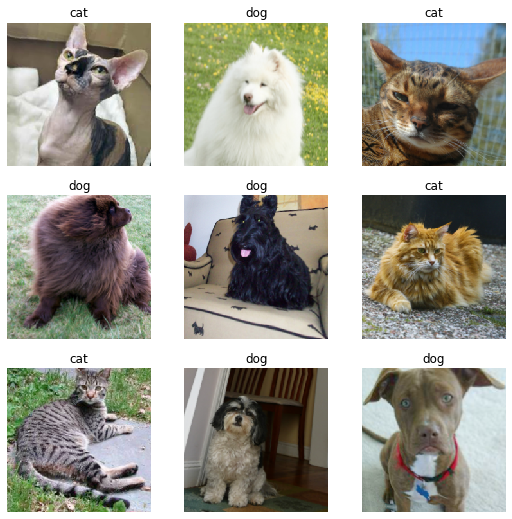

In [15]:
dls = dblock.dataloaders(path/"images")
dls.show_batch()

In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

KeyboardInterrupt: 

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,8))